In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz') # match people's info with codes
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
# df4 = pd.read_csv('zippedData/imdb.title.crew.csv.gz') # director and writer codes
df5 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df7 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
# df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz') # gives errors
# df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz') # gives errors
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [11]:
print('df1')
df1.info()
print('df2')
df2.info()
print('df3')
df3.info()
# print('df4')
# df4.info()
print('df5')
df5.info()
print('df6')
df6.info()
print('df7')
df7.info()
print('df8')
# df8.info()
# print('df9')
# df9.info()
print('df10')
df10.info()
print('df11')
df11.info()


df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
df2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
df3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             3

In [88]:
df1 = df1.set_index('tconst')
df1

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [19]:
df6.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [67]:
df6.quantile(.9)

averagerating       8.1
numvotes         1587.5
Name: 0.9, dtype: float64

In [57]:
rating = df6.sort_values(by=['averagerating'], ascending=False).loc[df6['numvotes'] > 1000].set_index('tconst')
rating
# movies with more than 1000 ratings, sorted by highest rating.
# contains no null values!
# correlation between num votes and revenue?

,averagerating,numvotes
tconst,,
tt7131622,9.7,5600
tt4131686,9.6,1339
tt6058226,9.6,2604
tt5963218,9.5,6509
tt7738784,9.4,9629
...,...,...
tt9364684,1.4,3511
tt4404474,1.3,6249
tt8081062,1.3,3244


In [58]:
actors = df5.loc[df5['ordering'] == 1].set_index('nconst').drop(columns=['job', 'ordering']) \
.dropna(subset=['category'])
actors.isna().sum()

tconst            0
category          0
characters    46907
dtype: int64

In [72]:
title = df2.set_index('nconst')
title

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [77]:
# Question: Does the gender of the main character affect movie rating?

j1 = actors.join(title, how='left').set_index('tconst').join(rating, how='right') \
.drop(columns=['primary_profession', 'known_for_titles', 'death_year', 'birth_year'])
j1 = j1.loc[(j1['category'] == 'actor') | (j1['category'] == 'actress')]


In [89]:
j2 = j1.join(df1, how='left')

In [78]:
j1

,category,characters,primary_name,averagerating,numvotes
tconst,,,,,
tt7131622,actor,"[""Rick Dalton""]",Leonardo DiCaprio,9.7,5600
tt6058226,actor,"[""Ekvtime Takaishvili""]",Rezo Chkhikvishvili,9.6,2604
tt5963218,actor,"[""King Walagamba""]",Uddika Premarathna,9.5,6509
tt7738784,actor,"[""Amudhavan""]",Mammootty,9.4,9629
tt5354160,actor,"[""Sharafat Karim Ayna""]",Chanchal Chowdhury,9.3,18470
...,...,...,...,...,...
tt1557843,actor,"[""Medical Clinic Guard""]",Greg Anderson,1.4,1252
tt9364684,actor,"[""Murat""]",Oguzhan Ugur,1.4,3511
tt4404474,actress,"[""Vivien""]",Joyce Ilg,1.3,6249


In [90]:
j2

,category,characters,primary_name,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,,,,
tt7131622,actor,"[""Rick Dalton""]",Leonardo DiCaprio,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
tt6058226,actor,"[""Ekvtime Takaishvili""]",Rezo Chkhikvishvili,9.6,2604,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History"
tt5963218,actor,"[""King Walagamba""]",Uddika Premarathna,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History"
tt7738784,actor,"[""Amudhavan""]",Mammootty,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
tt5354160,actor,"[""Sharafat Karim Ayna""]",Chanchal Chowdhury,9.3,18470,Aynabaji,Aynabaji,2016,147.0,"Crime,Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...
tt1557843,actor,"[""Medical Clinic Guard""]",Greg Anderson,1.4,1252,Purge,Purge,2010,80.0,"Drama,Sci-Fi"
tt9364684,actor,"[""Murat""]",Oguzhan Ugur,1.4,3511,Borç Harç,Borç Harç,2019,90.0,Comedy
tt4404474,actress,"[""Vivien""]",Joyce Ilg,1.3,6249,Potato Salad,Kartoffelsalat,2015,81.0,"Comedy,Horror"


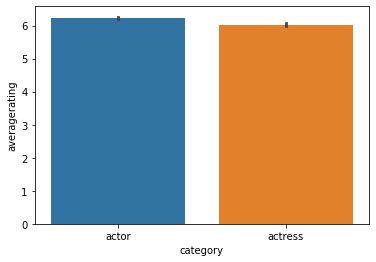

In [79]:
sns.barplot(j1.category, j1.averagerating)

In [40]:
df7.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
df10.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [71]:
df11 # no null values

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


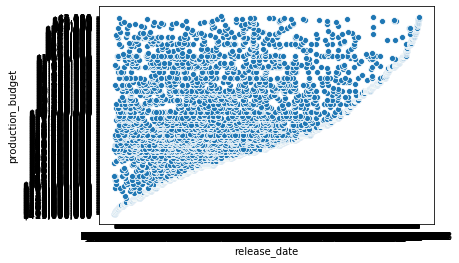

In [70]:
# How has production budget and gross incomes changed over the years?
# Does an increase in budget necessarily yield higher gross incomes?
sns.scatterplot(df11.release_date, df11.production_budget)